# Autoencoders

*Tutors*:
-- Federico Milanesio: federico.milanesio@unito.it
-- Davide Pirovano: davide.pirovano@unito.it

<div>
<img src="https://imgs.xkcd.com/comics/ai_hiring_algorithm.png" width="550"/>
</div>

In [ ]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import torchvision.transforms as transforms
import torchvision

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


# Setting up an autoencoder

We will use MNIST as our dataset. Note that we do not normalize our output given that they are already normalized in the range $[0,1]$, making additional normalization less critical. In the case of autoencoders, the primary goal is to **learn a representation (encoding) of the input data** that can accurately reconstruct the original input. The effectiveness of an autoencoder relies more on the architecture of the model and the optimization process rather than the preprocessing of input data. Still, this needs to be evaluated on a case-by-case basis

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


We now define our model. A few notes:


1.   We use linear layers for simplicity, but you can use any type of layer you want
2.   Encoder and decoder **do not share weights** in our network. Sharing weights between the encoder and decoder can reduce the total number of model parameters, which may lead to simpler models and reduced risk of overfitting, especially when training data is limited. But tied weights restrict the flexibility of the model, potentially limiting its ability to capture complex relationships between input and output. Whether to share weights between encoder and decoder is a choice that is based on **Task Complexity** and the application of you network
3. At the end we use a sigmoid forces the output to the range $[0, 1]$, interpreted as pixel intensity of a grey scale image.



In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),            # <-- this model only works with 28x28 images
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()                       # Output pixel values in range [0, 1] for grayscale images
        )

    def forward(self, x):

        # Flatten input image (an alternative to torch.flatten())
        x = x.view(x.size(0), -1)

        encoded = self.encoder(x)

        decoded = self.decoder(encoded)

        # Reshape decoded output to image shape (batch_size, 1, 28, 28)
        decoded = decoded.view(-1, 1, 28, 28)

        return decoded

model = Autoencoder()
model = model.to(device)

We will use **MSE**, a popular choice for training autoencoders, but other losses can be tried as well, such as Binary Cross Entropy and L1

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    loss = 0.0
    for x, _ in train_loader:

        x = x.to(device)

        # Forward pass
        x_pred = model(x)
        loss = criterion(x_pred, x)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss += loss.item()


    print(f"Epoch {epoch + 1}, Loss: {loss / len(train_loader):.5f}")


Epoch 1, Loss: 0.00016
Epoch 2, Loss: 0.00011
Epoch 3, Loss: 0.00011
Epoch 4, Loss: 0.00008
Epoch 5, Loss: 0.00008
Epoch 6, Loss: 0.00007
Epoch 7, Loss: 0.00008
Epoch 8, Loss: 0.00007
Epoch 9, Loss: 0.00007
Epoch 10, Loss: 0.00007


When training autoencoders, often it best to see the result of reconstruction instead of focusing only on the numerical loss of the model

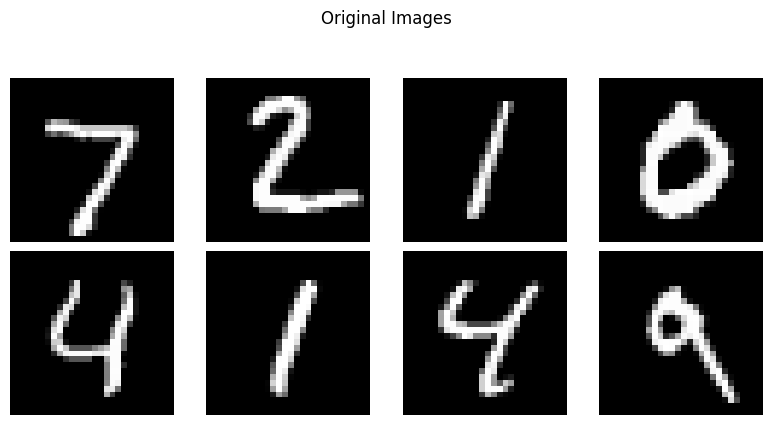

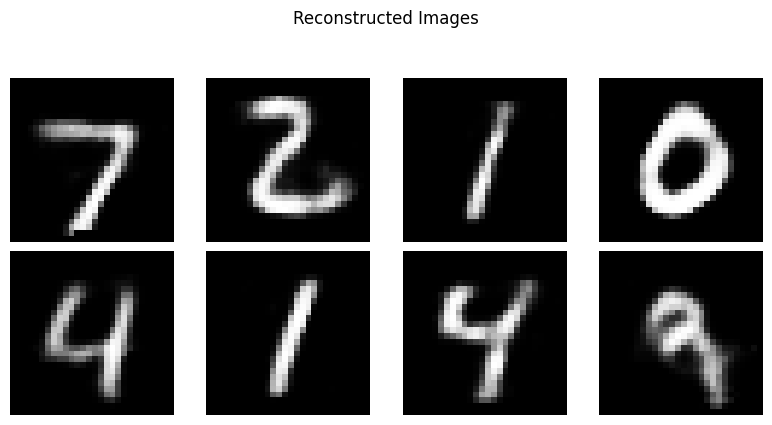

In [ ]:
# Evaluate the autoencoder on test data
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed_images = model(images)
        break

# Visualize original and reconstructed images
def plot_images(images, title):
    plt.figure(figsize=(8, 4))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].squeeze().numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle(title, y=1.05)
    plt.tight_layout()

# Plot original and reconstructed images
plot_images(images, title="Original Images")
plot_images(reconstructed_images, title="Reconstructed Images")

plt.show()


**Exercise**: Can we improve this performance by **optimizing hyperparameters** and adjusting the model architecture? Additionally, can we include a **visualization of the train and test loss** over the training process to detect signs of overfitting, or alternatively, implement early stopping? Are there **random transformation** we could implement on the training set?

In [ ]:
...

Ellipsis

*© 2024. This work is openly licensed via [CC BY-NC-SA 4.0 DEED](https://creativecommons.org/licenses/by-nc-sa/4.0/)*

*Comics used in the notebooks are from [xkcd.com](https://xkcd.com), and are licensed under the Creative Commons Attribution-NonCommercial 2.5 license.*

*Details and usage notes can be found at [xkcd.com/license.html](https://xkcd.com/license.html).*